In [402]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

hbar = 1.05457*1E-34

def pulse_time(angle, rabi_f):
    return angle / (2 * rabi_f)

def ramsey_sequence(state, driving_f, rabi_f, transition_f, noninteracting_t):
    H_interacting = np.array([[driving_f-transition_f, rabi_f], [rabi_f, -driving_f+transition_f]])
    H_noninteracting = np.array([[driving_f-transition_f, 0], [0, transition_f-driving_f]])

    U_1 = expm(H_interacting * -1j * pulse_time(np.pi/2, rabi_f))
    U_2 = expm(H_noninteracting * -1j * noninteracting_t)
    return U_1 @ U_2 @ U_1 @ state

def rabi_oscillations(state, driving_f, rabi_f, transition_f):
    H_interacting = np.array([[driving_f-transition_f, rabi_f], [rabi_f, 0]])
    U_1 = expm(H_interacting * -1j * pulse_time(np.pi, rabi_f))
    return U_1 @ state

rabi_f = 2*np.pi * 1E6
transition_f = 2*np.pi * 350 * 1E12


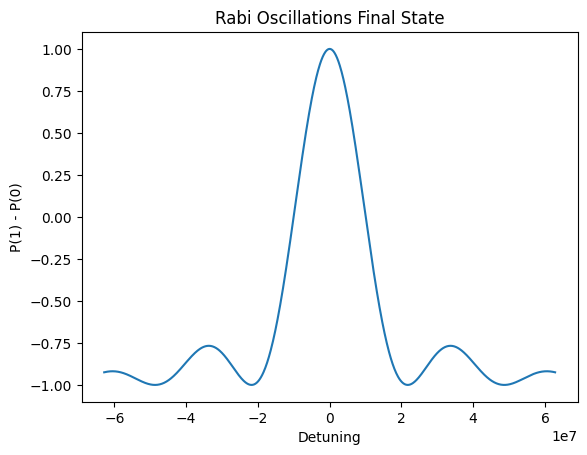

In [170]:
driving_f = np.linspace(transition_f-10*rabi_f, transition_f+10*rabi_f, 1000)
probability = []

for df in driving_f:
    final_state = rabi_oscillations([0, 1], df, rabi_f, transition_f)
    probability.append(abs(final_state[0])**2 - abs(final_state[1])**2)

plt.plot(driving_f-transition_f, probability)
plt.xlabel("Detuning")
plt.ylabel("P(1) - P(0)")
plt.title("Rabi Oscillations Final State")
plt.show()

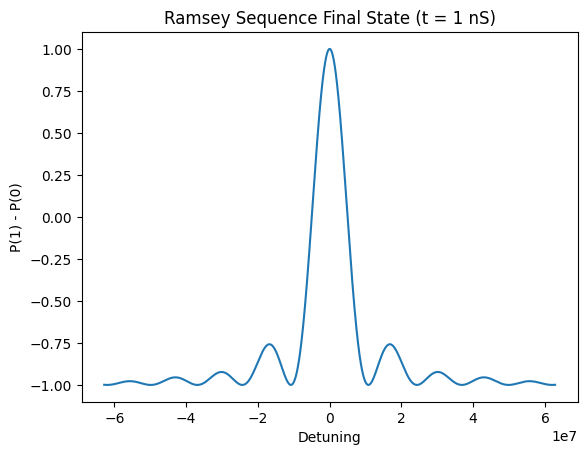

In [401]:
noninteracting_t = 1E-9
driving_f = np.linspace(transition_f-10*rabi_f, transition_f+10*rabi_f, 10000)
probability = []

for df in driving_f:
    final_state = ramsey_sequence([0, 1], df, rabi_f, transition_f, noninteracting_t)
    probability.append(abs(final_state[0])**2 - abs(final_state[1])**2)

plt.plot(driving_f-transition_f, probability)
plt.xlabel("Detuning")
plt.ylabel("P(1) - P(0)")
plt.title("Ramsey Sequence Final State (t = 1 nS)")
plt.show()

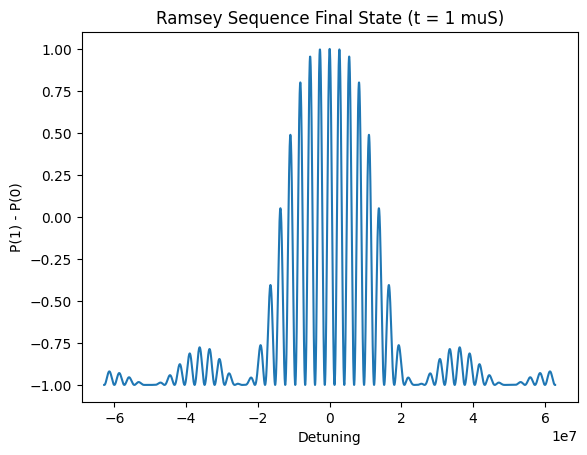

In [180]:
noninteracting_t = 1E-6
driving_f = np.linspace(transition_f-10*rabi_f, transition_f+10*rabi_f, 10000)
probability = []

for df in driving_f:
    final_state = ramsey_sequence([0, 1], df, rabi_f, transition_f, noninteracting_t)
    probability.append(abs(final_state[0])**2 - abs(final_state[1])**2)

plt.plot(driving_f-transition_f, probability)
plt.xlabel("Detuning")
plt.ylabel("P(1) - P(0)")
plt.title("Ramsey Sequence Final State (t = 1 muS)")
plt.show()

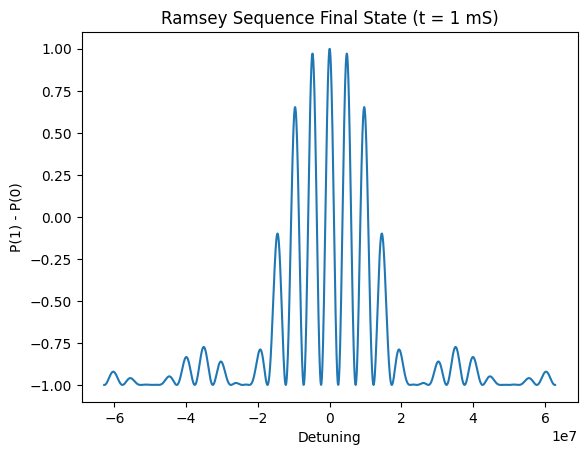

In [398]:
noninteracting_t = 1E-3
driving_f = np.linspace(transition_f-10*rabi_f, transition_f+10*rabi_f, 2000)
probability = []

for df in driving_f:
    final_state = ramsey_sequence([0, 1], df, rabi_f, transition_f, noninteracting_t)
    probability.append(abs(final_state[0])**2 - abs(final_state[1])**2)

plt.plot(driving_f-transition_f, probability)
plt.xlabel("Detuning")
plt.ylabel("P(1) - P(0)")
plt.title("Ramsey Sequence Final State (t = 1 mS)")
plt.show()

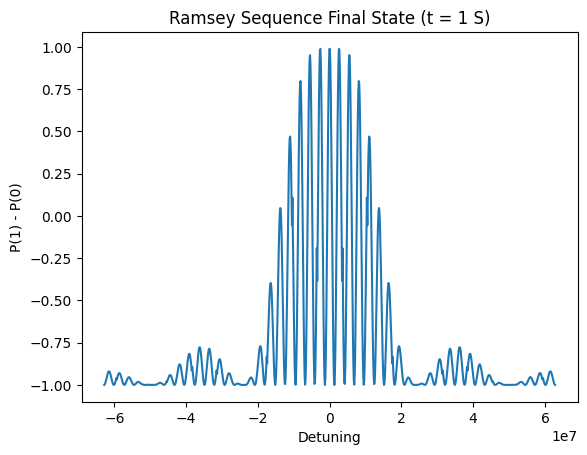

In [394]:
noninteracting_t = 1
driving_f = np.linspace(transition_f-10*rabi_f, transition_f+10*rabi_f, 1000)
probability = []

for df in driving_f:
    final_state = ramsey_sequence([0, 1], df, rabi_f, transition_f, noninteracting_t)
    probability.append(abs(final_state[0])**2 - abs(final_state[1])**2)

plt.plot(driving_f-transition_f, probability)
plt.xlabel("Detuning")
plt.ylabel("P(1) - P(0)")
plt.title("Ramsey Sequence Final State (t = 1 S)")
plt.show()

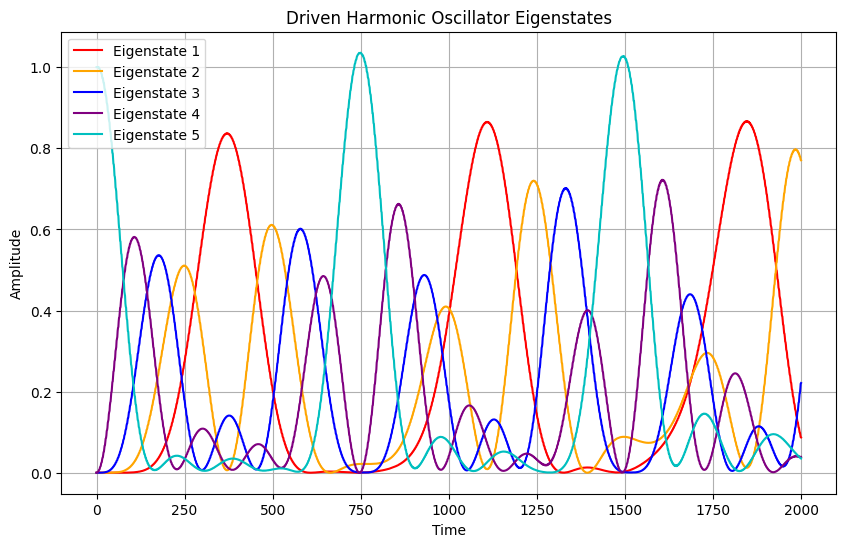

In [357]:
from scipy.linalg import expm
from scipy.sparse import diags
from scipy.integrate import complex_ode, solve_ivp

def eom(t, y, natural_f, driving_f, epsilon_D):
    n1, n2, n3, n4, n5 = y

    dn1dt = -1j * natural_f * (0.5 * n1 + epsilon_D * np.sqrt(2) * np.cos(driving_f/natural_f * t) * n2)
    dn2dt = -1j * natural_f * (1.5 * n2 + epsilon_D * np.cos(driving_f/natural_f * t) * (np.sqrt(2) * n1 + np.sqrt(3) * n3))
    dn3dt = -1j * natural_f * (2.5 * n3 + epsilon_D * np.cos(driving_f/natural_f * t) * (np.sqrt(3) * n2 + np.sqrt(4) * n4))
    dn4dt = -1j * natural_f * (3.5 * n4 + epsilon_D * np.cos(driving_f/natural_f * t) * (np.sqrt(4) * n3 + np.sqrt(5) * n5))
    dn5dt = -1j * natural_f * (4.5 * n5 + epsilon_D * np.cos(driving_f/natural_f * t) * np.sqrt(5) * n4)

    return [dn1dt, dn2dt, dn3dt, dn4dt, dn5dt]

natural_f = 1
driving_f = natural_f
epsilon_D = 0.01

t_span = [0, 2000]
t_eval = np.linspace(t_span[0], t_span[1], 2000)

sol = solve_ivp(eom, t_span, [0.0+0j, 0+0j, 0+0j, 0+0j, 1+0j], t_eval=t_eval, args=(natural_f, driving_f, epsilon_D))

# Plotting the results
plt.figure(figsize=(10,6))
colors = ['r', 'orange', 'b', 'purple', 'c']
labels = ['Eigenstate 1', 'Eigenstate 2', 'Eigenstate 3', 'Eigenstate 4', 'Eigenstate 5']

for i in range(5):
    plt.plot(sol.t, np.abs(sol.y[i])**2, color=colors[i], label=labels[i])

plt.title('Driven Harmonic Oscillator Eigenstates')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

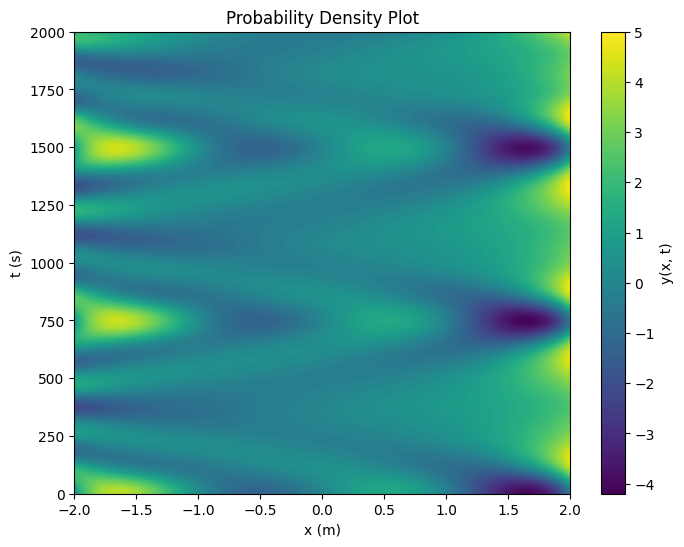

In [358]:
X, T = np.meshgrid(x, sol.t)

plt.figure(figsize=(8, 6))
hermite_gauss = [sum([abs(sol.y[i-1][j])**2 * special.hermite(i, monic=True)(x) for i in range(1,6)]) for j in range(len(sol.t))]
contour = plt.contourf(X, T, hermite_gauss, levels=100, cmap='viridis')
plt.colorbar(contour).set_label('y(x, t)')
plt.xlabel('x (m)')
plt.ylabel('t (s)')
plt.title('Probability Density Plot')

plt.show()

w/w_0 = 0.9

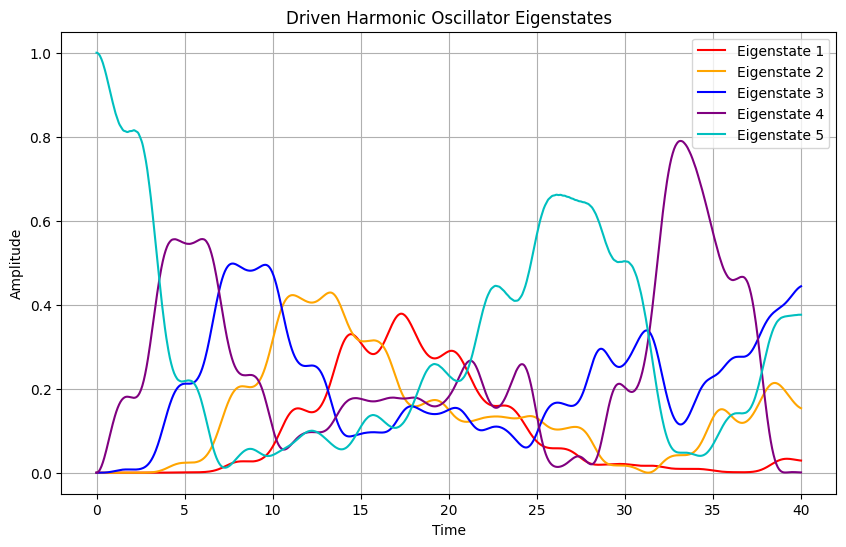

In [355]:
natural_f = 1
driving_f = 0.9*natural_f
epsilon_D = 0.2

t_span = [0, 40]
t_eval = np.linspace(t_span[0], t_span[1], 1000)

sol = solve_ivp(eom, t_span, [0.0+0j, 0+0j, 0+0j, 0+0j, 1+0j], t_eval=t_eval, args=(natural_f, driving_f, epsilon_D))

# Plotting the results
plt.figure(figsize=(10,6))
colors = ['r', 'orange', 'b', 'purple', 'c']
labels = ['Eigenstate 1', 'Eigenstate 2', 'Eigenstate 3', 'Eigenstate 4', 'Eigenstate 5']

for i in range(5):
    plt.plot(sol.t, np.abs(sol.y[i])**2, color=colors[i], label=labels[i])

plt.title('Driven Harmonic Oscillator Eigenstates')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

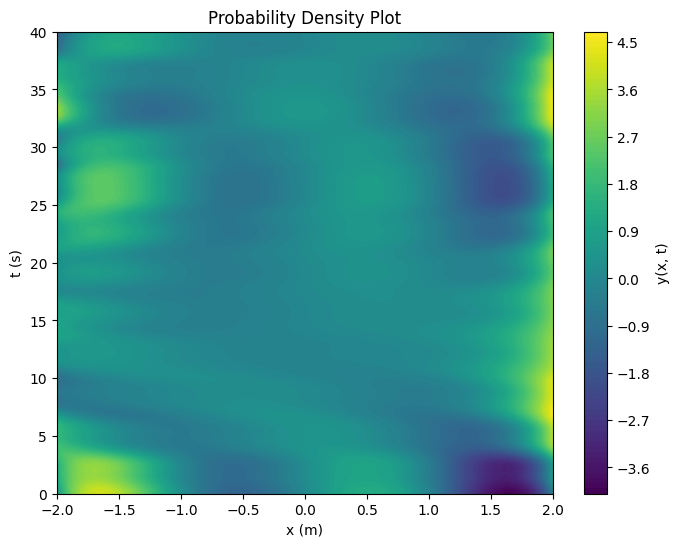

In [356]:
X, T = np.meshgrid(x, sol.t)

plt.figure(figsize=(8, 6))
hermite_gauss = [sum([abs(sol.y[i-1][j])**2 * special.hermite(i, monic=True)(x) for i in range(1,6)]) for j in range(len(sol.t))]
contour = plt.contourf(X, T, hermite_gauss, levels=100, cmap='viridis')
plt.colorbar(contour).set_label('y(x, t)')
plt.xlabel('x (m)')
plt.ylabel('t (s)')
plt.title('Probability Density Plot')

plt.show()

Resonant Oscillations Between 0 and 1, without other states

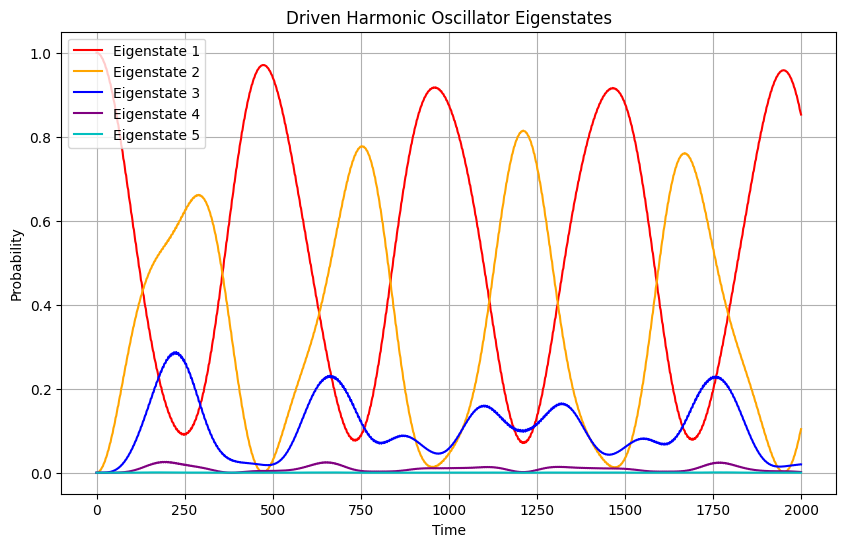

In [359]:
from scipy.linalg import expm
from scipy.sparse import diags
from scipy.integrate import complex_ode, solve_ivp

def eom_new(t, y, natural_f, driving_f, epsilon_D, energy_coeff):
    n1, n2, n3, n4, n5 = y

    dn1dt = -1j * natural_f * (0.5 * n1 + epsilon_D * np.sqrt(2) * np.cos(driving_f/natural_f * t) * n2)
    dn2dt = -1j * natural_f * ((1.5 + energy_coeff * 2) * n2 + epsilon_D * np.cos(driving_f/natural_f * t) * (np.sqrt(2) * n1 + np.sqrt(3) * n3))
    dn3dt = -1j * natural_f * ((2.5 + energy_coeff * 6) * n3 + epsilon_D * np.cos(driving_f/natural_f * t) * (np.sqrt(3) * n2 + np.sqrt(4) * n4))
    dn4dt = -1j * natural_f * ((3.5 + energy_coeff * 12) * n4 + epsilon_D * np.cos(driving_f/natural_f * t) * (np.sqrt(4) * n3 + np.sqrt(5) * n5))
    dn5dt = -1j * natural_f * ((4.5 + energy_coeff * 20) * n5 + epsilon_D * np.cos(driving_f/natural_f * t) * np.sqrt(5) * n4)

    return [dn1dt, dn2dt, dn3dt, dn4dt, dn5dt]

natural_f = 1
driving_f = 1*natural_f
epsilon_D = 0.01
energy_coeff = 0.0038
# energy_coeff = 6*beta * epsilon_D**4 * (hbar * natural_f)**4 / alpha

t_span = [0, 2000]
t_eval = np.linspace(t_span[0], t_span[1], 1000)

sol = solve_ivp(eom_new, t_span, [1.0+0j, 0+0j, 0+0j, 0+0j, 0+0j], t_eval=t_eval, args=(natural_f, driving_f, epsilon_D, energy_coeff))

# Plotting the results
plt.figure(figsize=(10,6))
colors = ['r', 'orange', 'b', 'purple', 'c']
labels = ['Eigenstate 1', 'Eigenstate 2', 'Eigenstate 3', 'Eigenstate 4', 'Eigenstate 5']

for i in range(5):
    plt.plot(sol.t, np.abs(sol.y[i])**2, color=colors[i], label=labels[i])

plt.title('Driven Harmonic Oscillator Eigenstates')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

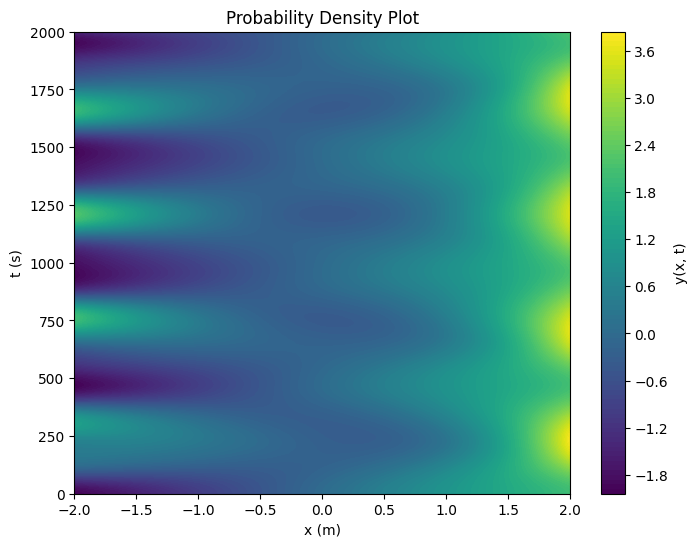

In [360]:
X, T = np.meshgrid(x, sol.t)

plt.figure(figsize=(8, 6))
hermite_gauss = [sum([abs(sol.y[i-1][j])**2 * special.hermite(i, monic=True)(x) for i in range(1,6)]) for j in range(len(sol.t))]
contour = plt.contourf(X, T, hermite_gauss, levels=100, cmap='viridis')
plt.colorbar(contour).set_label('y(x, t)')
plt.xlabel('x (m)')
plt.ylabel('t (s)')
plt.title('Probability Density Plot')

plt.show()